# Rajveer Sodhi

## Research Questions:


#### 1. Out of all the data columns, which features seem to be the most highly correlated with the breast cancer's diagnosis, and can we define an approximate percentage probability of the breast cancer being benign or malignant based only on the values from these features?

To analyse this, we can start by computing which features are the most recurrent with a type of cancer. The more times the feature is present (or of a certain value) in a certain type of cancer, the more important we may consider it to be. This could be achieved via scatter plots or bar plots. After identifying these features, we can simply calculate how many cancer cases of a certain type out of the population correlate with this feature to find the probability of the given features to indicate a chance for a benign or malignant cancer.

#### 2. Are there certain subsets of features that seem to be internally correlated? By extension, can we predict the values of other features in this subset given the value of just one?

To answer this question, we can create layered bar graphs and heat maps to notice any patterns in the values and try to find a correlation coefficient for them. That way, we could potentially link all characteristics in the subset together. Heat maps can offer a healpful insight into high correlations, as done in the EDA below. However, these relationships need to be further explored and mathematically formulated to answer the above question and potentially make predictions.

## Loading the Dataset:


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import linregress
import project_functions2 as pf

# importing and cleaning dataset with method chaining:
filename = "../data/raw/data.csv"
data = pf.load_and_process(filename)
data.to_csv("../data/processed/processed_data2.csv")
pf.load_and_process_for_tableau_and_export(filename)
data

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,Benign,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,0.1432,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127
1,Benign,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.11260,0.1737,0.1362,0.08178,0.2487,0.06766
2,Benign,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.02027,0.1695,...,14.29,24.04,93.85,624.6,0.13680,0.2170,0.2413,0.08829,0.3218,0.07470
3,Benign,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,0.1650,...,14.73,21.70,93.76,663.5,0.12130,0.1676,0.1364,0.06987,0.2741,0.07582
4,Benign,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,...,18.13,25.45,117.20,1009.0,0.13380,0.1679,0.1663,0.09123,0.2394,0.06469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Malignant,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,...,13.74,26.38,91.93,591.7,0.13850,0.4092,0.4504,0.18650,0.5774,0.10300
565,Malignant,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,...,13.24,32.82,91.76,508.1,0.21840,0.9379,0.8402,0.25240,0.4154,0.14030
566,Malignant,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,...,19.92,25.27,129.00,1233.0,0.13140,0.2236,0.2802,0.12160,0.2792,0.08158
567,Malignant,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,...,18.55,21.43,121.40,971.4,0.14110,0.2164,0.3355,0.16670,0.3414,0.07147


## Exploratory Data Analysis (EDA)

First, let's find out basic information about our dataset to begin.

In [3]:

print("The shape (rows, columns) of the dataset is: ", data.shape)

The shape (rows, columns) of the dataset is:  (569, 31)


In [4]:
print("The columns in the dataset are:")
data.columns

The columns in the dataset are:


Index(['Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter',
       'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity',
       'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension',
       'Standard Error of Radius', 'Standard Error of Texture',
       'Standard Error of Perimeter', 'Standard Error of Area',
       'Standard Error of Smoothness', 'Standard Error of Compactness',
       'Standard Error of Concavity', 'Standard Error of Concave Points',
       'Standard Error of Symmetry', 'Standard Error of Fractal Dimension',
       'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area',
       'Worst Smoothness', 'Worst Compactness', 'Worst Concavity',
       'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension'],
      dtype='object')

In [5]:
print("The first 5 rows (or head) of the dataset is: ")
data.head()

The first 5 rows (or head) of the dataset is: 


,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
284,Benign,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,0.1432,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127
371,Benign,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.11260,0.1737,0.1362,0.08178,0.2487,0.06766
367,Benign,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.02027,0.1695,...,14.29,24.04,93.85,624.6,0.13680,0.2170,0.2413,0.08829,0.3218,0.07470
364,Benign,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,0.1650,...,14.73,21.70,93.76,663.5,0.12130,0.1676,0.1364,0.06987,0.2741,0.07582
363,Benign,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,...,18.13,25.45,117.20,1009.0,0.13380,0.1679,0.1663,0.09123,0.2394,0.06469


In [6]:
print("Information about values in the dataset is:")
data.info()

Information about values in the dataset is:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 284 to 0
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Diagnosis                            569 non-null    object 
 1   Mean Radius                          569 non-null    float64
 2   Mean Texture                         569 non-null    float64
 3   Mean Perimeter                       569 non-null    float64
 4   Mean Area                            569 non-null    float64
 5   Mean Smoothness                      569 non-null    float64
 6   Mean Compactness                     569 non-null    float64
 7   Mean Concavity                       569 non-null    float64
 8   Mean Concave Points                  569 non-null    float64
 9   Mean Symmetry                        569 non-null    float64
 10  Mean Fractal Dimension               569 non-null    f

In [7]:
print("Description of dataset:")
data.describe(exclude = np.number)

Description of dataset:


,Diagnosis
count,569
unique,2
top,Benign
freq,357


In [8]:
print("Let's see the full description of the dataset now:")
data.describe()

Let's see the full description of the dataset now:


,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
print("Let's view the possible values of the final diagnosis of breast cancers in the dataset. We can then explore the breakdown of these values in the dataset and move on to correlating these values with other columns.")
data.Diagnosis.unique()

Let's view the possible values of the final diagnosis of breast cancers in the dataset. We can then explore the breakdown of these values in the dataset and move on to correlating these values with other columns.


array(['Benign', 'Malignant'], dtype=object)

Number of malignant cases: 212
Number of benign cases: 357

Here is a useful visualization of this breakdown:
As visible, the number of benign cases are 1.6839622641509433 times the number of malignant cases.


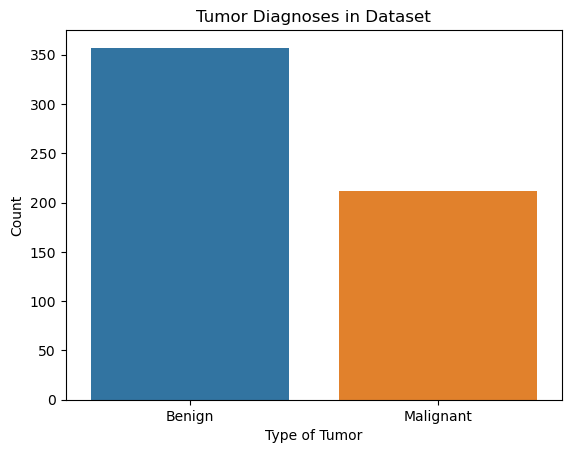

In [10]:
m = data["Diagnosis"].value_counts()["Malignant"]
b = data["Diagnosis"].value_counts()["Benign"]
print("Number of malignant cases:", m)
print("Number of benign cases:", b)
print()
print("Here is a useful visualization of this breakdown:")
diag = sns.countplot(data = data, x = 'Diagnosis').set(title = "Tumor Diagnoses in Dataset", xlabel = "Type of Tumor", ylabel = "Count")
print("As visible, the number of benign cases are", b/m, "times the number of malignant cases.")

Now, let's try to explore the relationship between the values in the dataset.
The following is a heatmap of all numerical values in the dataset:


Text(0.5, 1.0, 'Heatmap of Dataset')

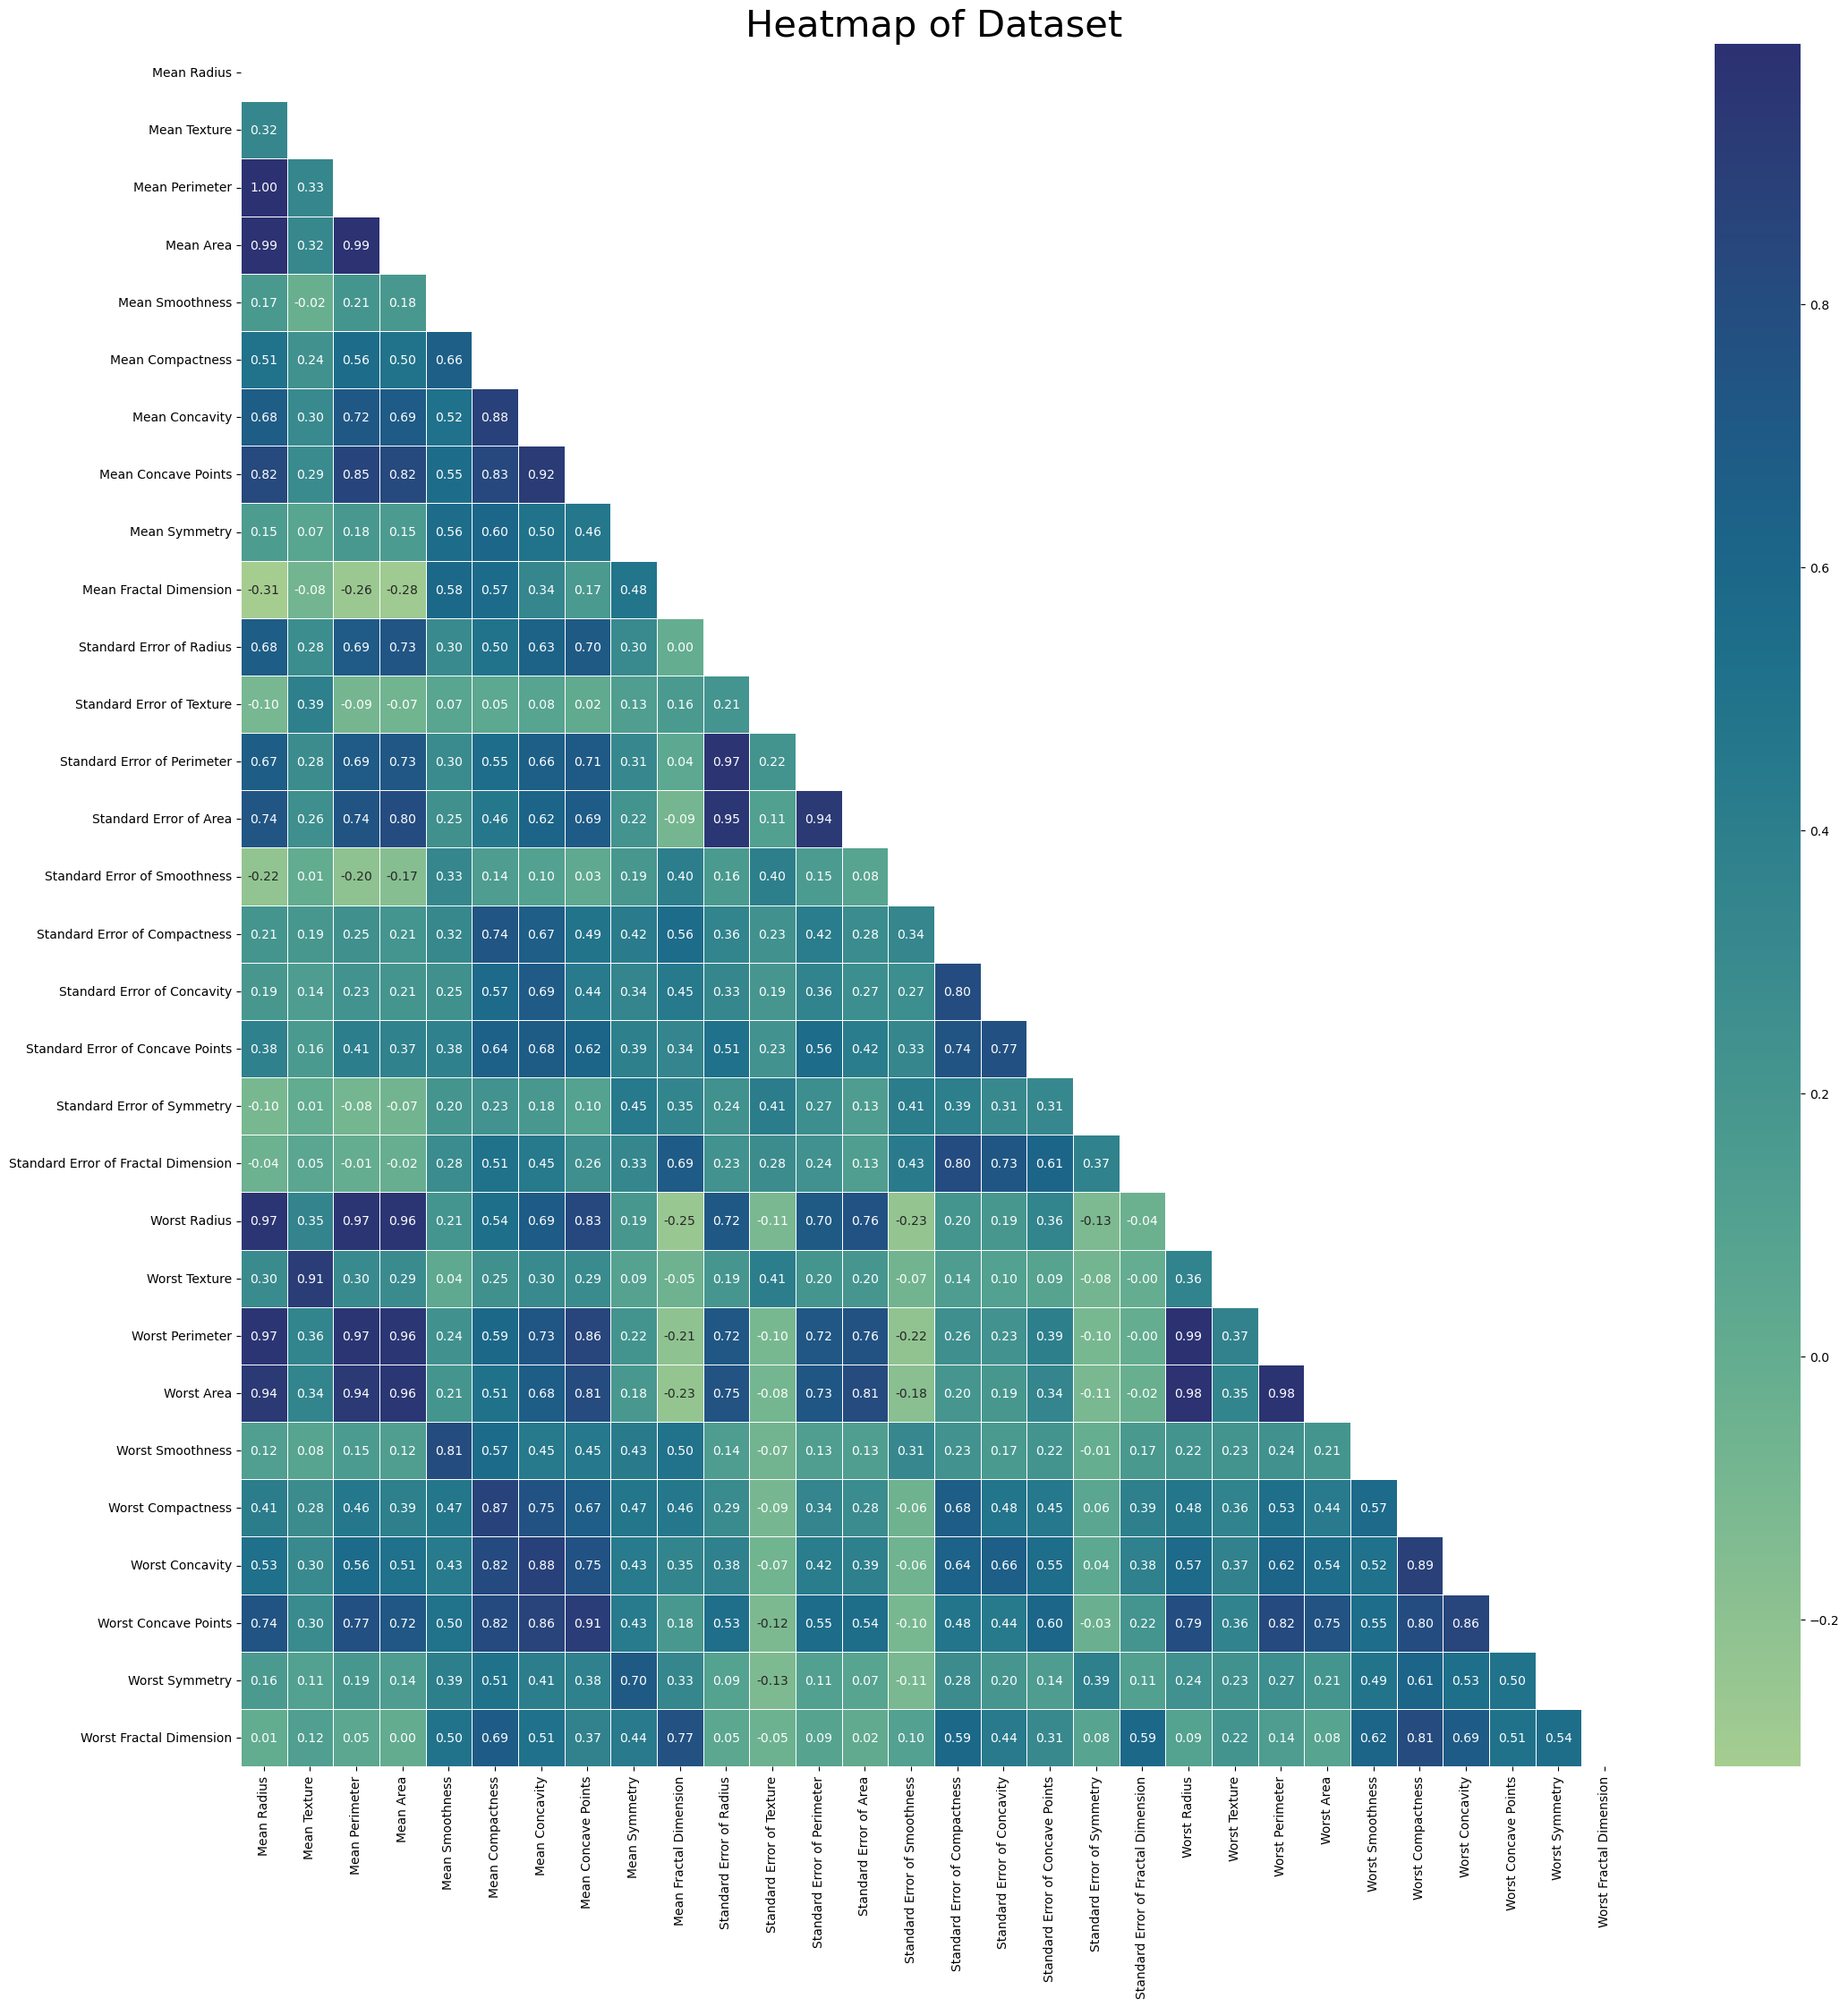

In [13]:
print("Now, let's try to explore the relationship between the values in the dataset.")
print("The following is a heatmap of all numerical values in the dataset:")

num_d = data.corr(numeric_only = True)
plt.figure(figsize = (25, 25))
matrix = np.triu(num_d)
heat = sns.heatmap(data = num_d, annot = True, fmt = ".2f", linewidth = 0.5, cmap = "crest", mask = matrix)
plt.title("Heatmap of Dataset", size = 30)

In order to view the correlations more simply, we can create a simplified version of this heatmap by only considering the mean variables. This should greatly decrease the number of variables presented while still presenting an accurate representation of our dataset:

Text(0.5, 1.0, 'Simplified Heatmap of Dataset (Only Mean Values)')

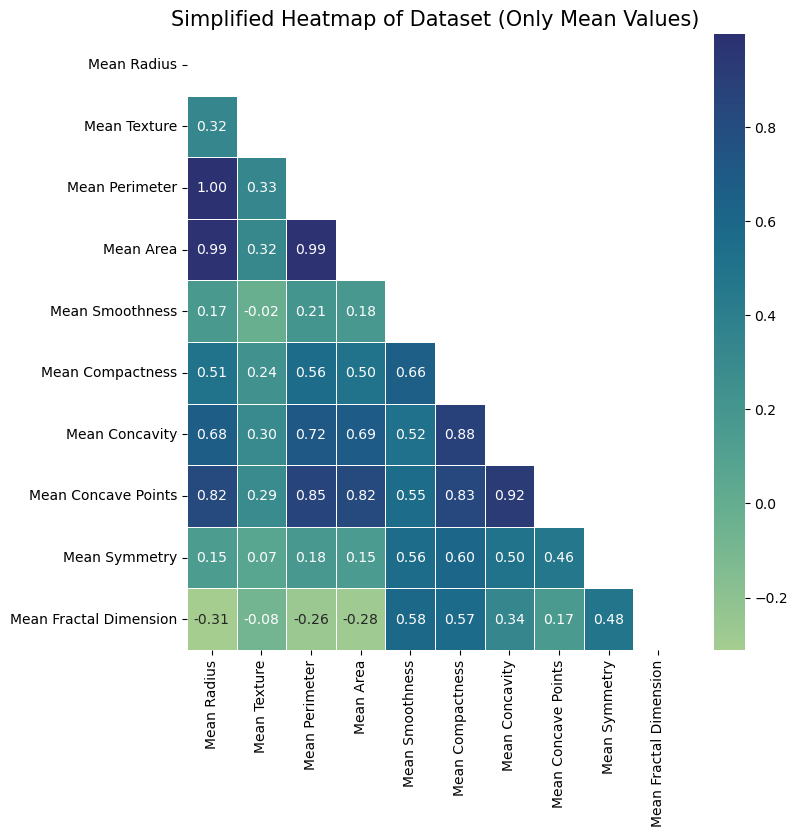

In [14]:
mean_data = data.loc[:, ["Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave Points", "Mean Symmetry", "Mean Fractal Dimension"]]
mean_num_d = mean_data.corr(numeric_only = True)
plt.figure(figsize=(8, 8))
mean_matrix = np.triu(mean_num_d)
heat = sns.heatmap(data = mean_num_d, annot = True, fmt = ".2f", linewidth = 0.5, cmap = "crest", mask = mean_matrix)
plt.title("Simplified Heatmap of Dataset (Only Mean Values)", size = 15)

We can also filter the original heatmap as so to only view high correlation values:

Text(0.5, 1.0, 'Heatmap of Dataset (Filtered; >=0.850)')

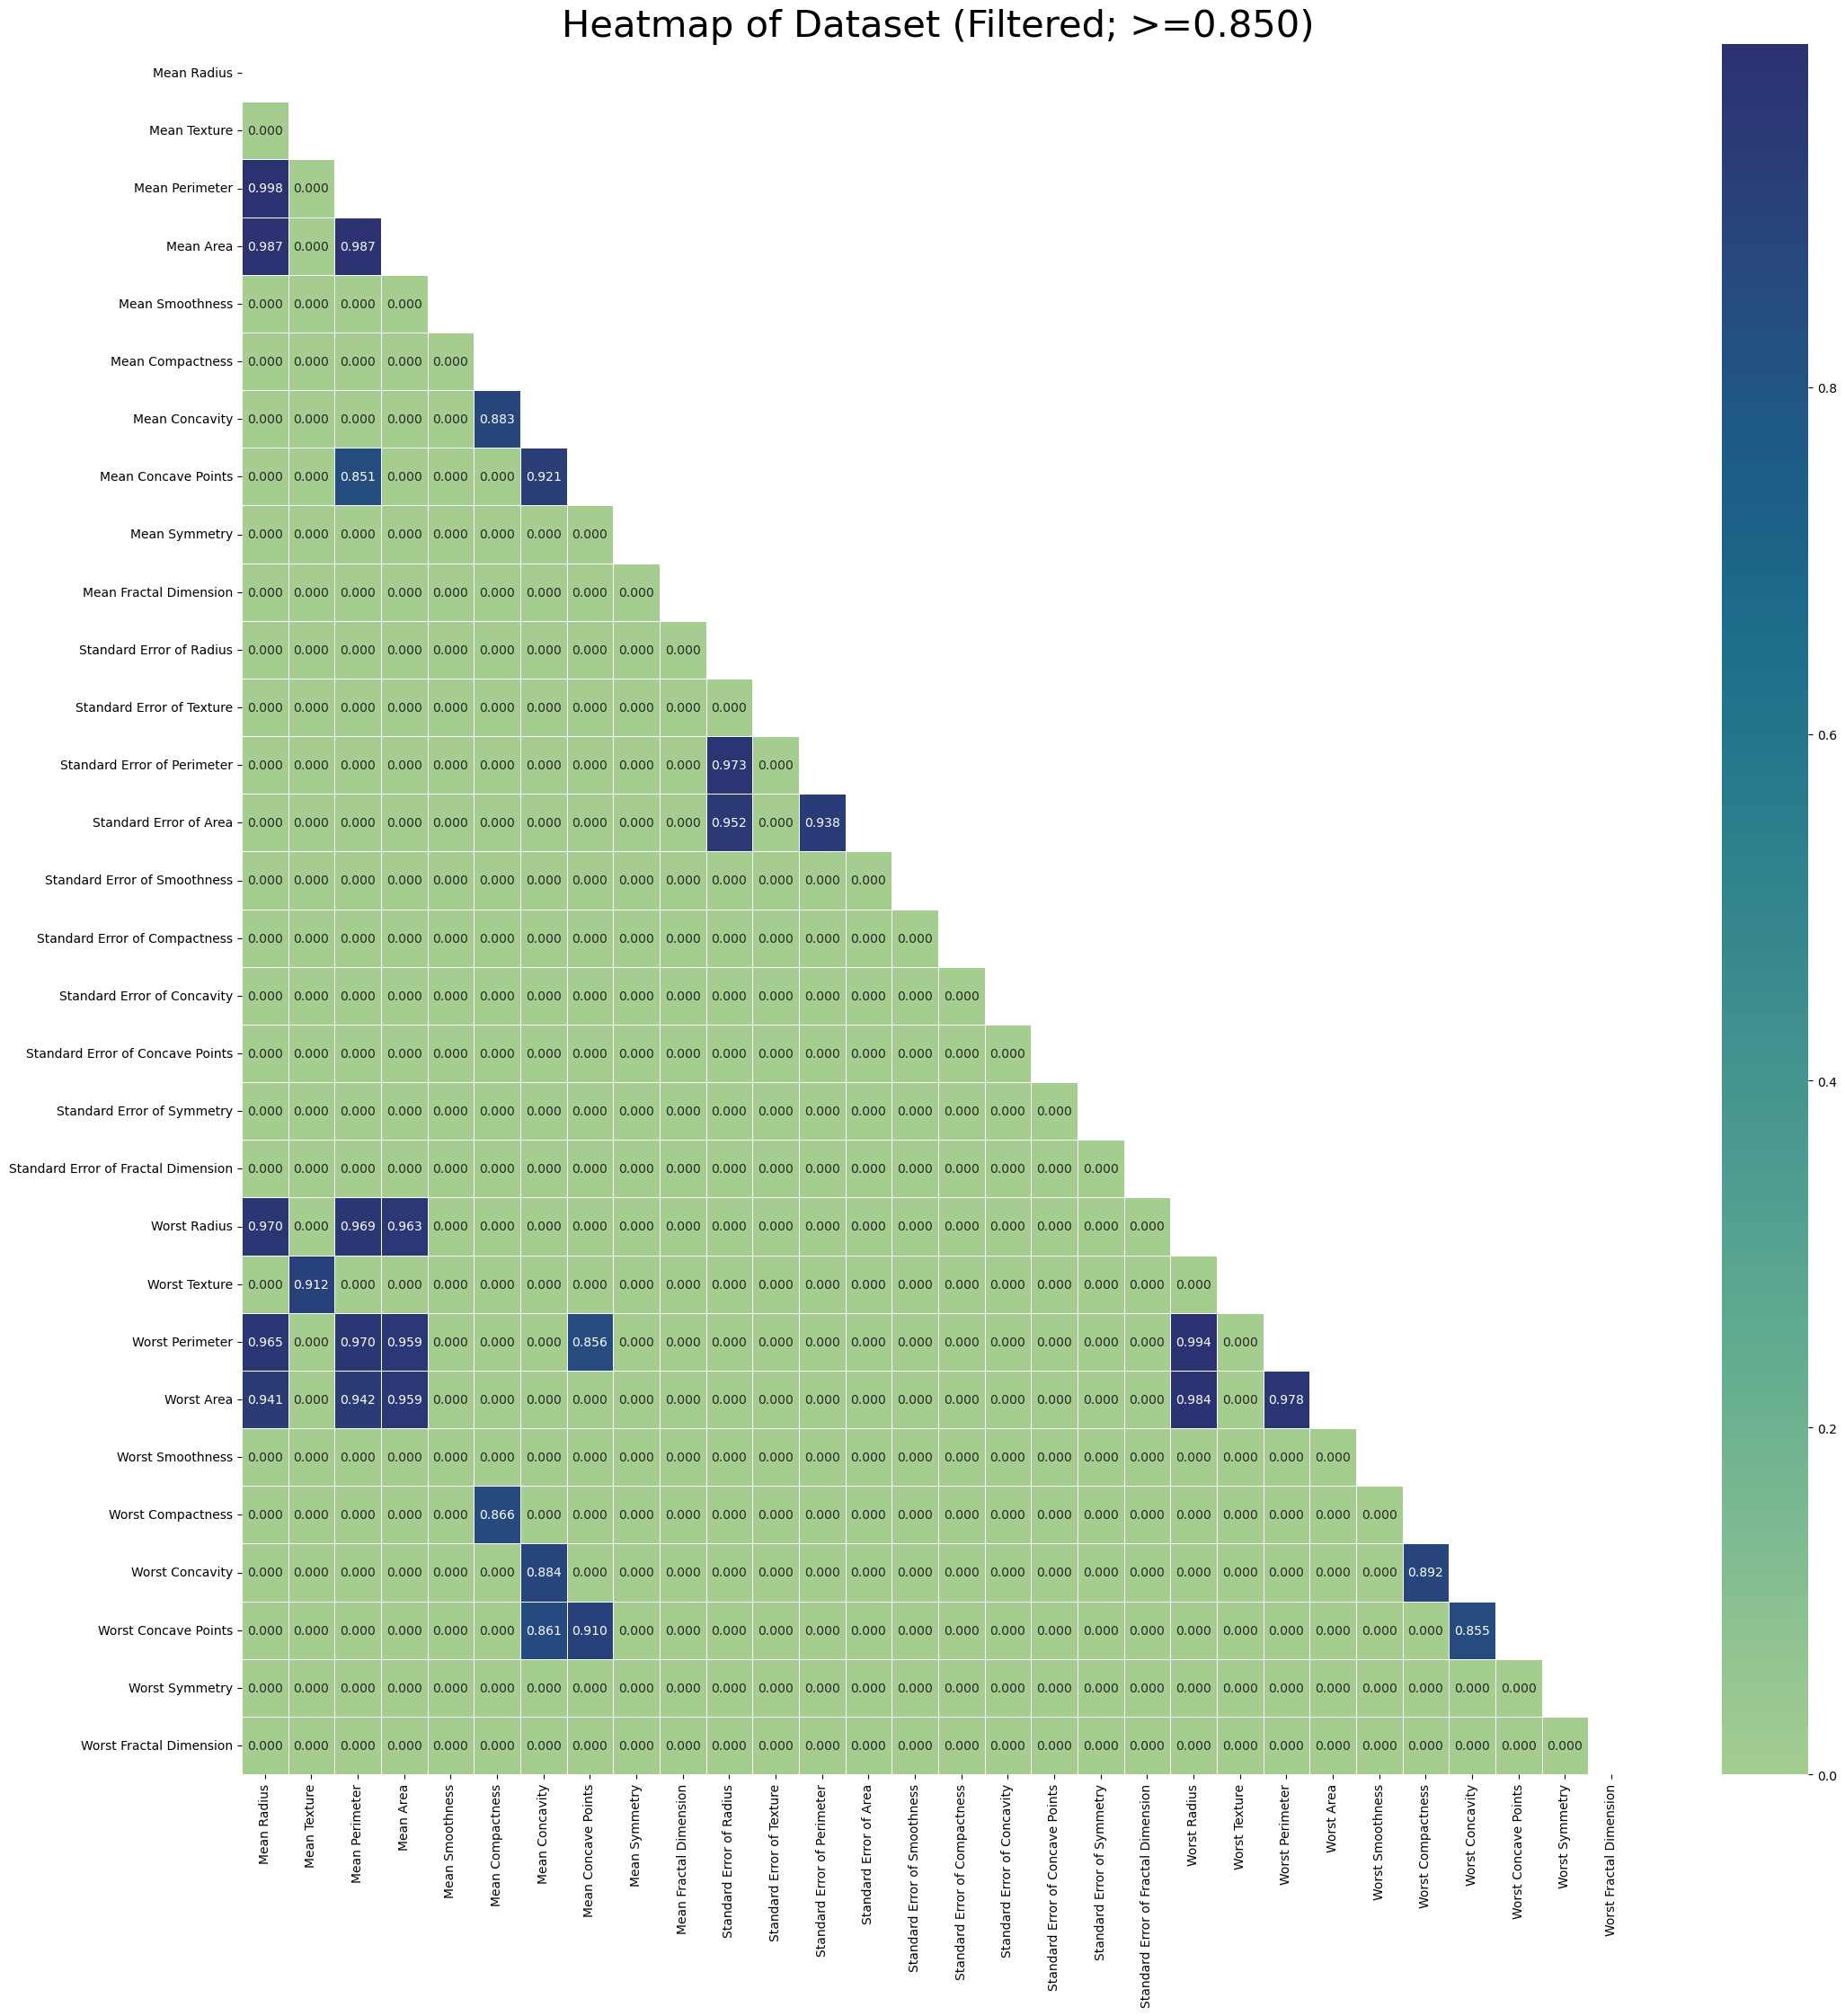

In [80]:
filtered = num_d
filtered[abs(filtered) < 0.850] = 0
plt.figure(figsize=(25, 25))
heat = sns.heatmap(data = filtered, annot = True, fmt = ".3f", linewidth = 0.5, cmap = "crest", mask = matrix)
plt.title("Heatmap of Dataset (Filtered; >=0.850)", size = 30)

From the above filtered heatmap, we can clearly notice that the following (not including different aspects of same value such as compactness_worst and compactness_mean) values are highly correlated. That is, the changes in value A closely imply similar changes in value B:

- *Worst Concave Points* and *Mean Concavity*
- *Worst Concave Points* and *Worst Concavity*
- *Worst Convacity* and *Worst Compactness*
- *Worst Area* and *Mean Radius*
- *Worst Area* and *Mean Perimeter*
- *Worst Area* and *Worst Radius*
- *Worst Area* and *Worst Perimeter*
- *Worst Permieter* and *Mean Radius*
- *Worst Perimeter* and *Mean Area*
- *Worst Permieter* and *Mean Concave Points*
- *Worst Perimeter* and *Worst Radius*
- *Worst Radius* and *Mean Perimeter*
- *Worst Radius* and *Mean Area*
- *Standard Error of Area* and *Standard Error of Radius*
- *Standard Error of Area* and *Standard Error of Perimeter*
- *Standard Error of Perimeter* and *Standard Error of Radius*
- *Mean Concave Points* and *Mean Perimeter*
- *Mean Concave Points* and *Mean Concavity*
- *Mean Concavity* and *Mean Compactness*
- *Mean Area* and *Mean Radius*
- *Mean Area* and *Mean Perimeter*
- *Mean Perimeter* and *Mean Radius*

We can analyze these relations to answer the second EDA quesiton.

Furthermore, we can analyze the differences in values such as radius_mean, perimeter_mean, and area_mean between the two types of cancers for a clearer picture of correlations:

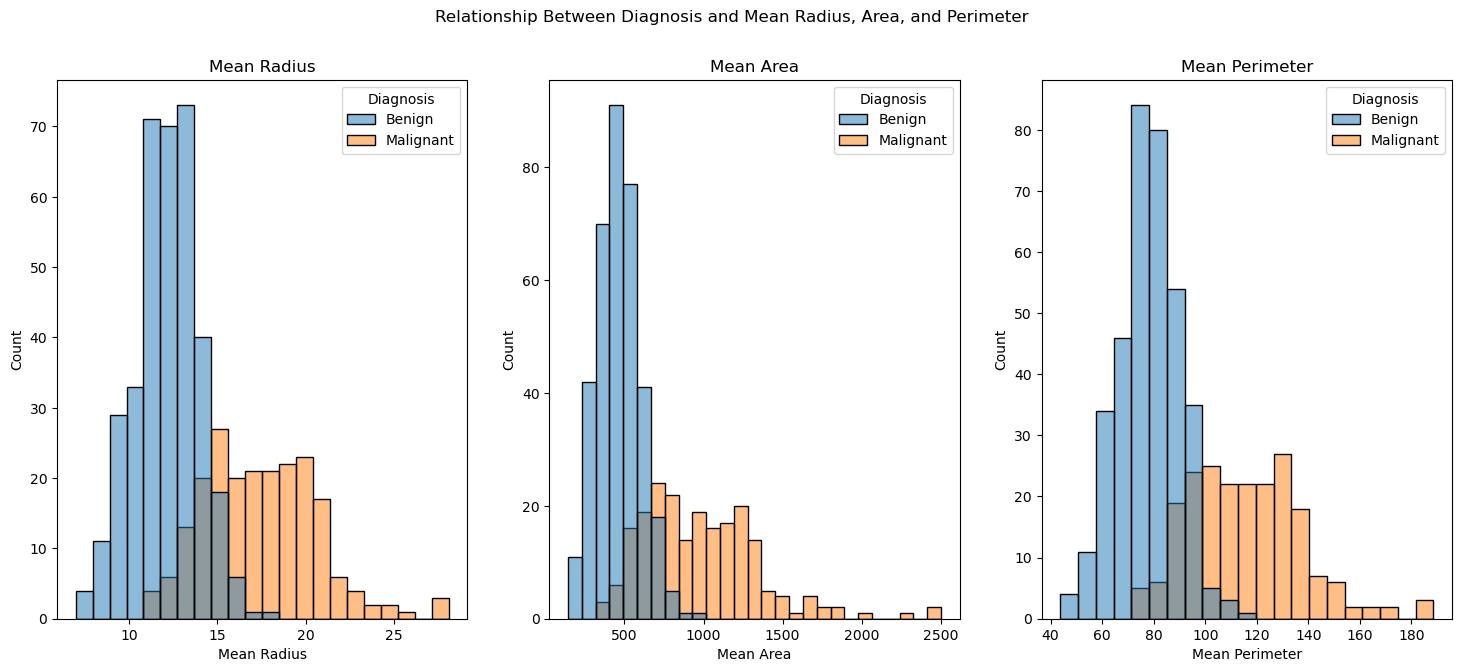

In [72]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 7))

hist1 = sns.histplot(data = data, x = "Mean Radius", hue = "Diagnosis", ax = axes[0])
hist2 = sns.histplot(data = data, x = "Mean Area", hue = "Diagnosis", ax = axes[1])
hist3 = sns.histplot(data = data, x = "Mean Perimeter", hue = "Diagnosis", ax = axes[2])

axes[0].set(title = "Mean Radius")
axes[1].set(title = "Mean Area")
axes[2].set(title = "Mean Perimeter")

fig.suptitle("Relationship Between Diagnosis and Mean Radius, Area, and Perimeter")

plt.show()

The above histographs clearly illustrate that benign cancer diagnoses have significantly lower mean radii, areas, and perimeters than malignant diagnoses of cancer. Benign tumours have much higher frequencies of cases lying in the first half of the range of the mean radius/area/perimeter. This is valuable information and a great starting ooint for the first question in our EDA.

Additionally, it is also important to note that in all the graphs, the values for malignant diagnoses of cancer are all **positively skewed**.

Let us now explore the relationship of a particular diagnoses with other variables.
Using a violin plot, we can compare values of the texture_mean of the two types of tumors.


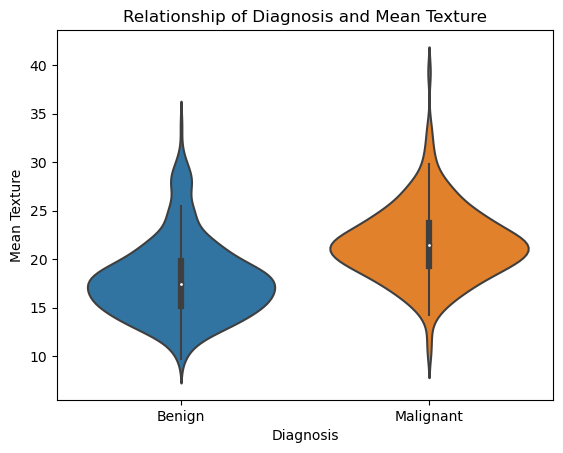

In [73]:
violin = sns.violinplot(data = data, x = "Diagnosis", y = "Mean Texture").set(title = "Relationship of Diagnosis and Mean Texture")
plt.show()

As visible above, the mean value of the textures in malignant cases is slightly higher than that in benign cases, with a majority of them clustered around a value of approximately 22 whereas the mean texture of benign cases is mostly clustered around (approx) 17.

Next, we can also use a jointplot to analyze the relation between the concavity_mean values and the diagnoses.

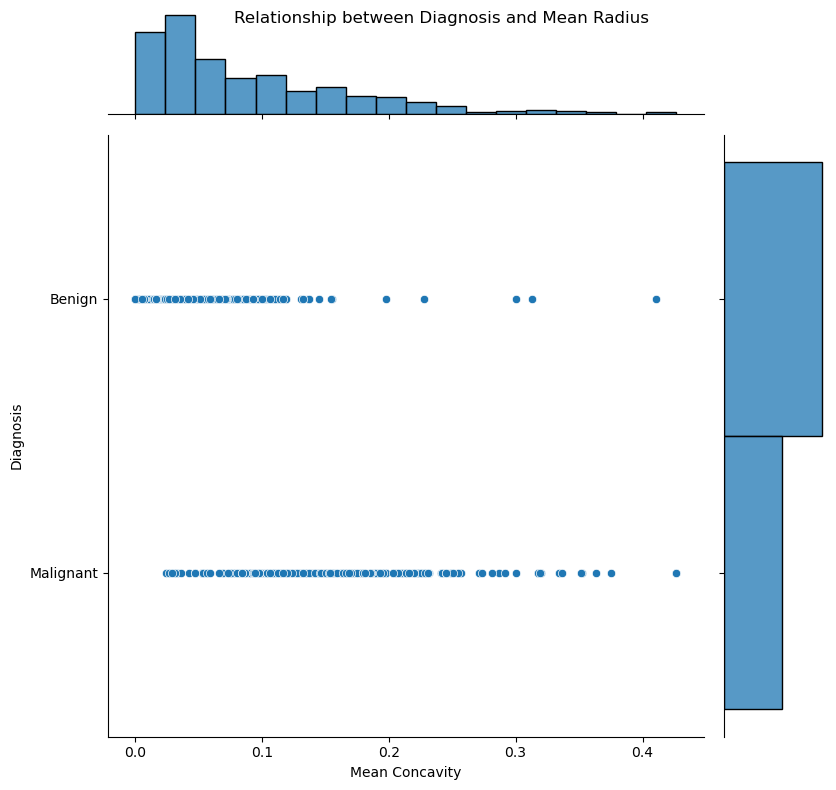

In [74]:
joint = sns.jointplot(data = data, x = "Mean Concavity", y = "Diagnosis", height = 8)
plt.suptitle("Relationship between Diagnosis and Mean Radius")
plt.show()

We can observe in the above graph:
- The data is positively skewed.
- There are more benign case observations than malignant.
- Benign cases mostly have a low value of Mean Concavity whereas malignant cases also have a significant population of higher values.

#### From this superficial analysis, we can tell that there are certain and observable differences in the various aspects of a breast cancer detection based on whether it is diagnosed to be a benign tumor or malignant one.

## Analysis:

With the EDA, we can now try to defiantly answer our research questions.

### Question 1: Out of all the data columns, which features seem to be the most highly correlated with the breast cancer's diagnosis, and can we define an approximate percentage probability of the breast cancer being benign or malignant based only on the values from these features?

To answer this question armed with the above Exploratory Data Analysis, we can map the correlations of each column with diagnosis. To give the Diagnosis column a numeric value, I am going to create a new dataset and assign a value of 1 to each malignant case and a value of 0 to each benign case. Then, we will find the correlations using a heatmap as seen below:

Text(0.5, 1.0, 'High Correlation (>= 0.750) of Columns with Diagnosis Column')

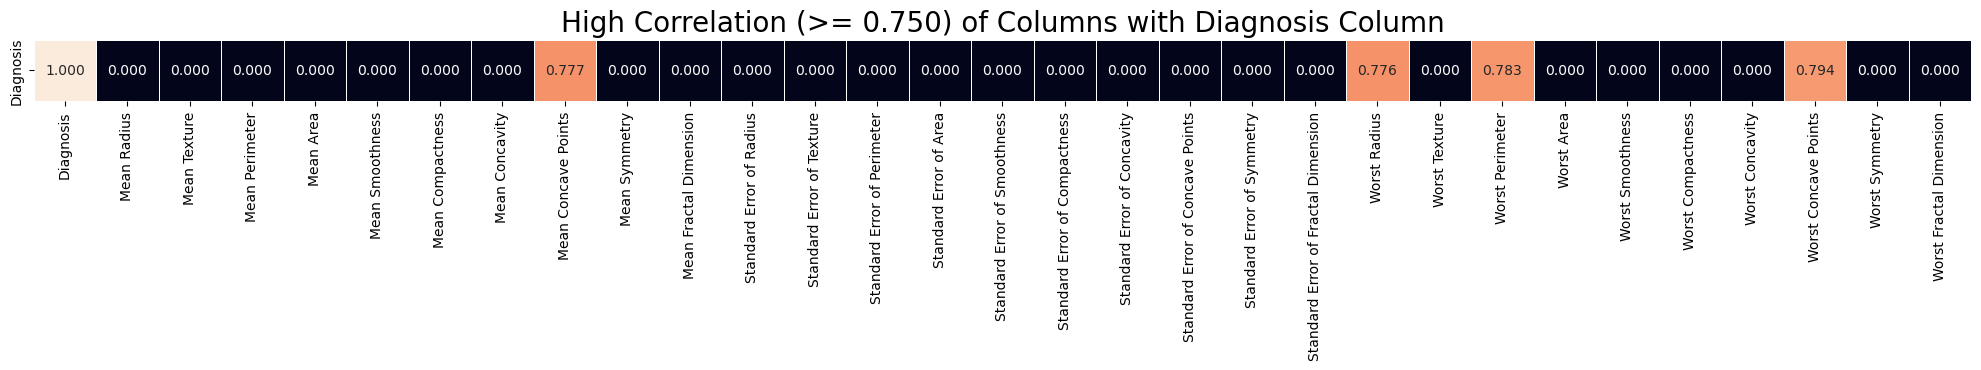

In [75]:
# Assigning numeric values to the Diagnosis column and creating a new correlation matrix
diag_data = data.assign(Diagnosis = lambda x: x["Diagnosis"].map({"Malignant": 1, "Benign": 0}))
diag_num_d = diag_data.corr(numeric_only = True)

# Select just one row of the correlation matrix
diag_num = diag_num_d.iloc[0, :]

# Reshape the row into a DataFrame
diag_num_d = diag_num.to_frame().T

# Creating a heatmap showing the correlation values of all the columns in the database with the Diagnosis column
diag_num_d[abs(diag_num_d) < 0.750] = 0
plt.figure(figsize = (25, 0.8))
diag_heat = sns.heatmap(data = diag_num_d, annot = True, fmt = ".3f", linewidth = 0.5, cbar = False)
plt.title("High Correlation (>= 0.750) of Columns with Diagnosis Column", size = 20)

According to the above heatmap, the value of a diagnosis is highly correlated to *Mean Concave Points*, *Worst Radius*, *Worst Perimeter*, and *Worst Concave Points* with a correlation value of 0.777, 0.776, 0.783, and 0.794 respectively.

We can now use this information to analyze how these columns' values actually affect the diagnosis result with pair plots before moving to the third and final step of the analysis of this question.

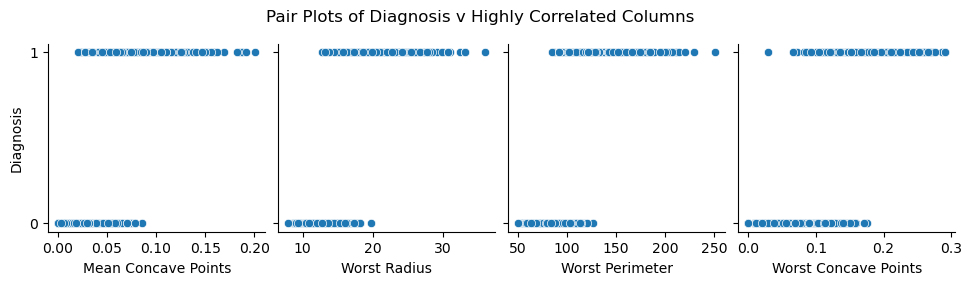

In [76]:
sns.pairplot(data = diag_data, x_vars = diag_data[["Mean Concave Points", "Worst Radius", "Worst Perimeter", "Worst Concave Points"]], y_vars = ["Diagnosis"], kind = "scatter")
plt.suptitle("Pair Plots of Diagnosis v Highly Correlated Columns", y = 1.1)
plt.yticks(np.arange(0, 2))
plt.show()

We can clearly see in the above graphs that the tumor is categorized as "Benign" if:
- The value of *Mean Concave Points* is in the approximate range (0, 0.085)
- The value of *Worst Radius* is in the approximate range (0, 19)
- The value of *Worst Perimeter* is in the approximate range (50, 125)
- The value of *Worst Concave Points* is in the approximate range (0, 0.17)

With these value ranges, let us look at the filtered dataset with these conditions:

In [77]:
q1_data = data[["Diagnosis", "Mean Concave Points", "Worst Radius", "Worst Perimeter", "Worst Concave Points"]]
q1_data = q1_data[(q1_data["Mean Concave Points"] < 0.085) & (data["Worst Radius"] < 19) & (data["Worst Perimeter"] > 50) & (data["Worst Perimeter"] < 125) & (data["Worst Concave Points"] < 0.17)]
q1_data

,Diagnosis,Mean Concave Points,Worst Radius,Worst Perimeter,Worst Concave Points
284,Benign,0.03390,13.90,92.12,0.10170
371,Benign,0.02657,16.20,104.50,0.08178
367,Benign,0.02027,14.29,93.85,0.08829
364,Benign,0.01473,14.73,93.76,0.06987
363,Benign,0.04835,18.13,117.20,0.09123
...,...,...,...,...,...
100,Malignant,0.04489,16.99,108.60,0.11840
99,Malignant,0.05839,16.33,109.50,0.15650
385,Malignant,0.05271,15.79,102.20,0.13590
171,Malignant,0.03438,17.98,116.60,0.11600


Let us view the breakdown of diagnoses in this dataset:

Total number of cases in this subset: 387
Number of malignant cases: 34
Number of benign cases: 353

Here is a useful visualization of this breakdown:


[Text(0, 0, '353'), Text(0, 0, '34')]

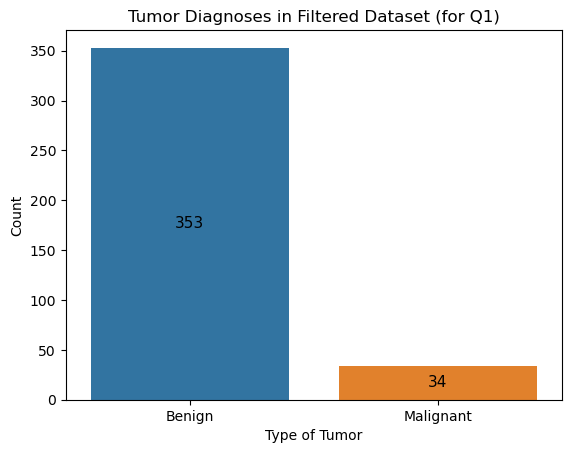

In [78]:
m = q1_data["Diagnosis"].value_counts()["Malignant"]
b = q1_data["Diagnosis"].value_counts()["Benign"]
print("Total number of cases in this subset:", m + b)
print("Number of malignant cases:", m)
print("Number of benign cases:", b)
print()
print("Here is a useful visualization of this breakdown:")
diag = sns.countplot(data = q1_data, x = 'Diagnosis')
diag.set(title = "Tumor Diagnoses in Filtered Dataset (for Q1)", xlabel = "Type of Tumor", ylabel = "Count")
diag.bar_label(diag.containers[0], label_type = "center", size = 11)

The high value of benign cases compared to malignant cases shows the indisputable success of our data analysis. Out of the 387 filtered results, 353 are benign - as we predicted - and only 34 are malignant. This is a success rate of 91.21%.

#### Therefore, we can answer our research question by claiming that according to this sample, the most highly important values to a tumor being categorized as benign or malignant are Concave Points, Worst Radius, Worst Perimeter, and Worst Concave Points. Furhter, we can say with 91.21% certainty that a tumour is going to be Benign if we select a case with (0 < Concave Points < 0.085), (0 < Worst Radius < 19), (50 < Worst Perimeter < 125), and (0 < Worst Concave Points < 0.17).


### Question 2: Are there certain subsets of features that seem to be internally correlated? By extension, can we predict the values of other features in this subset given the value of just one?

To answer this question, we must once again look at the filtered heatmap from our EDA of all the values against each other:

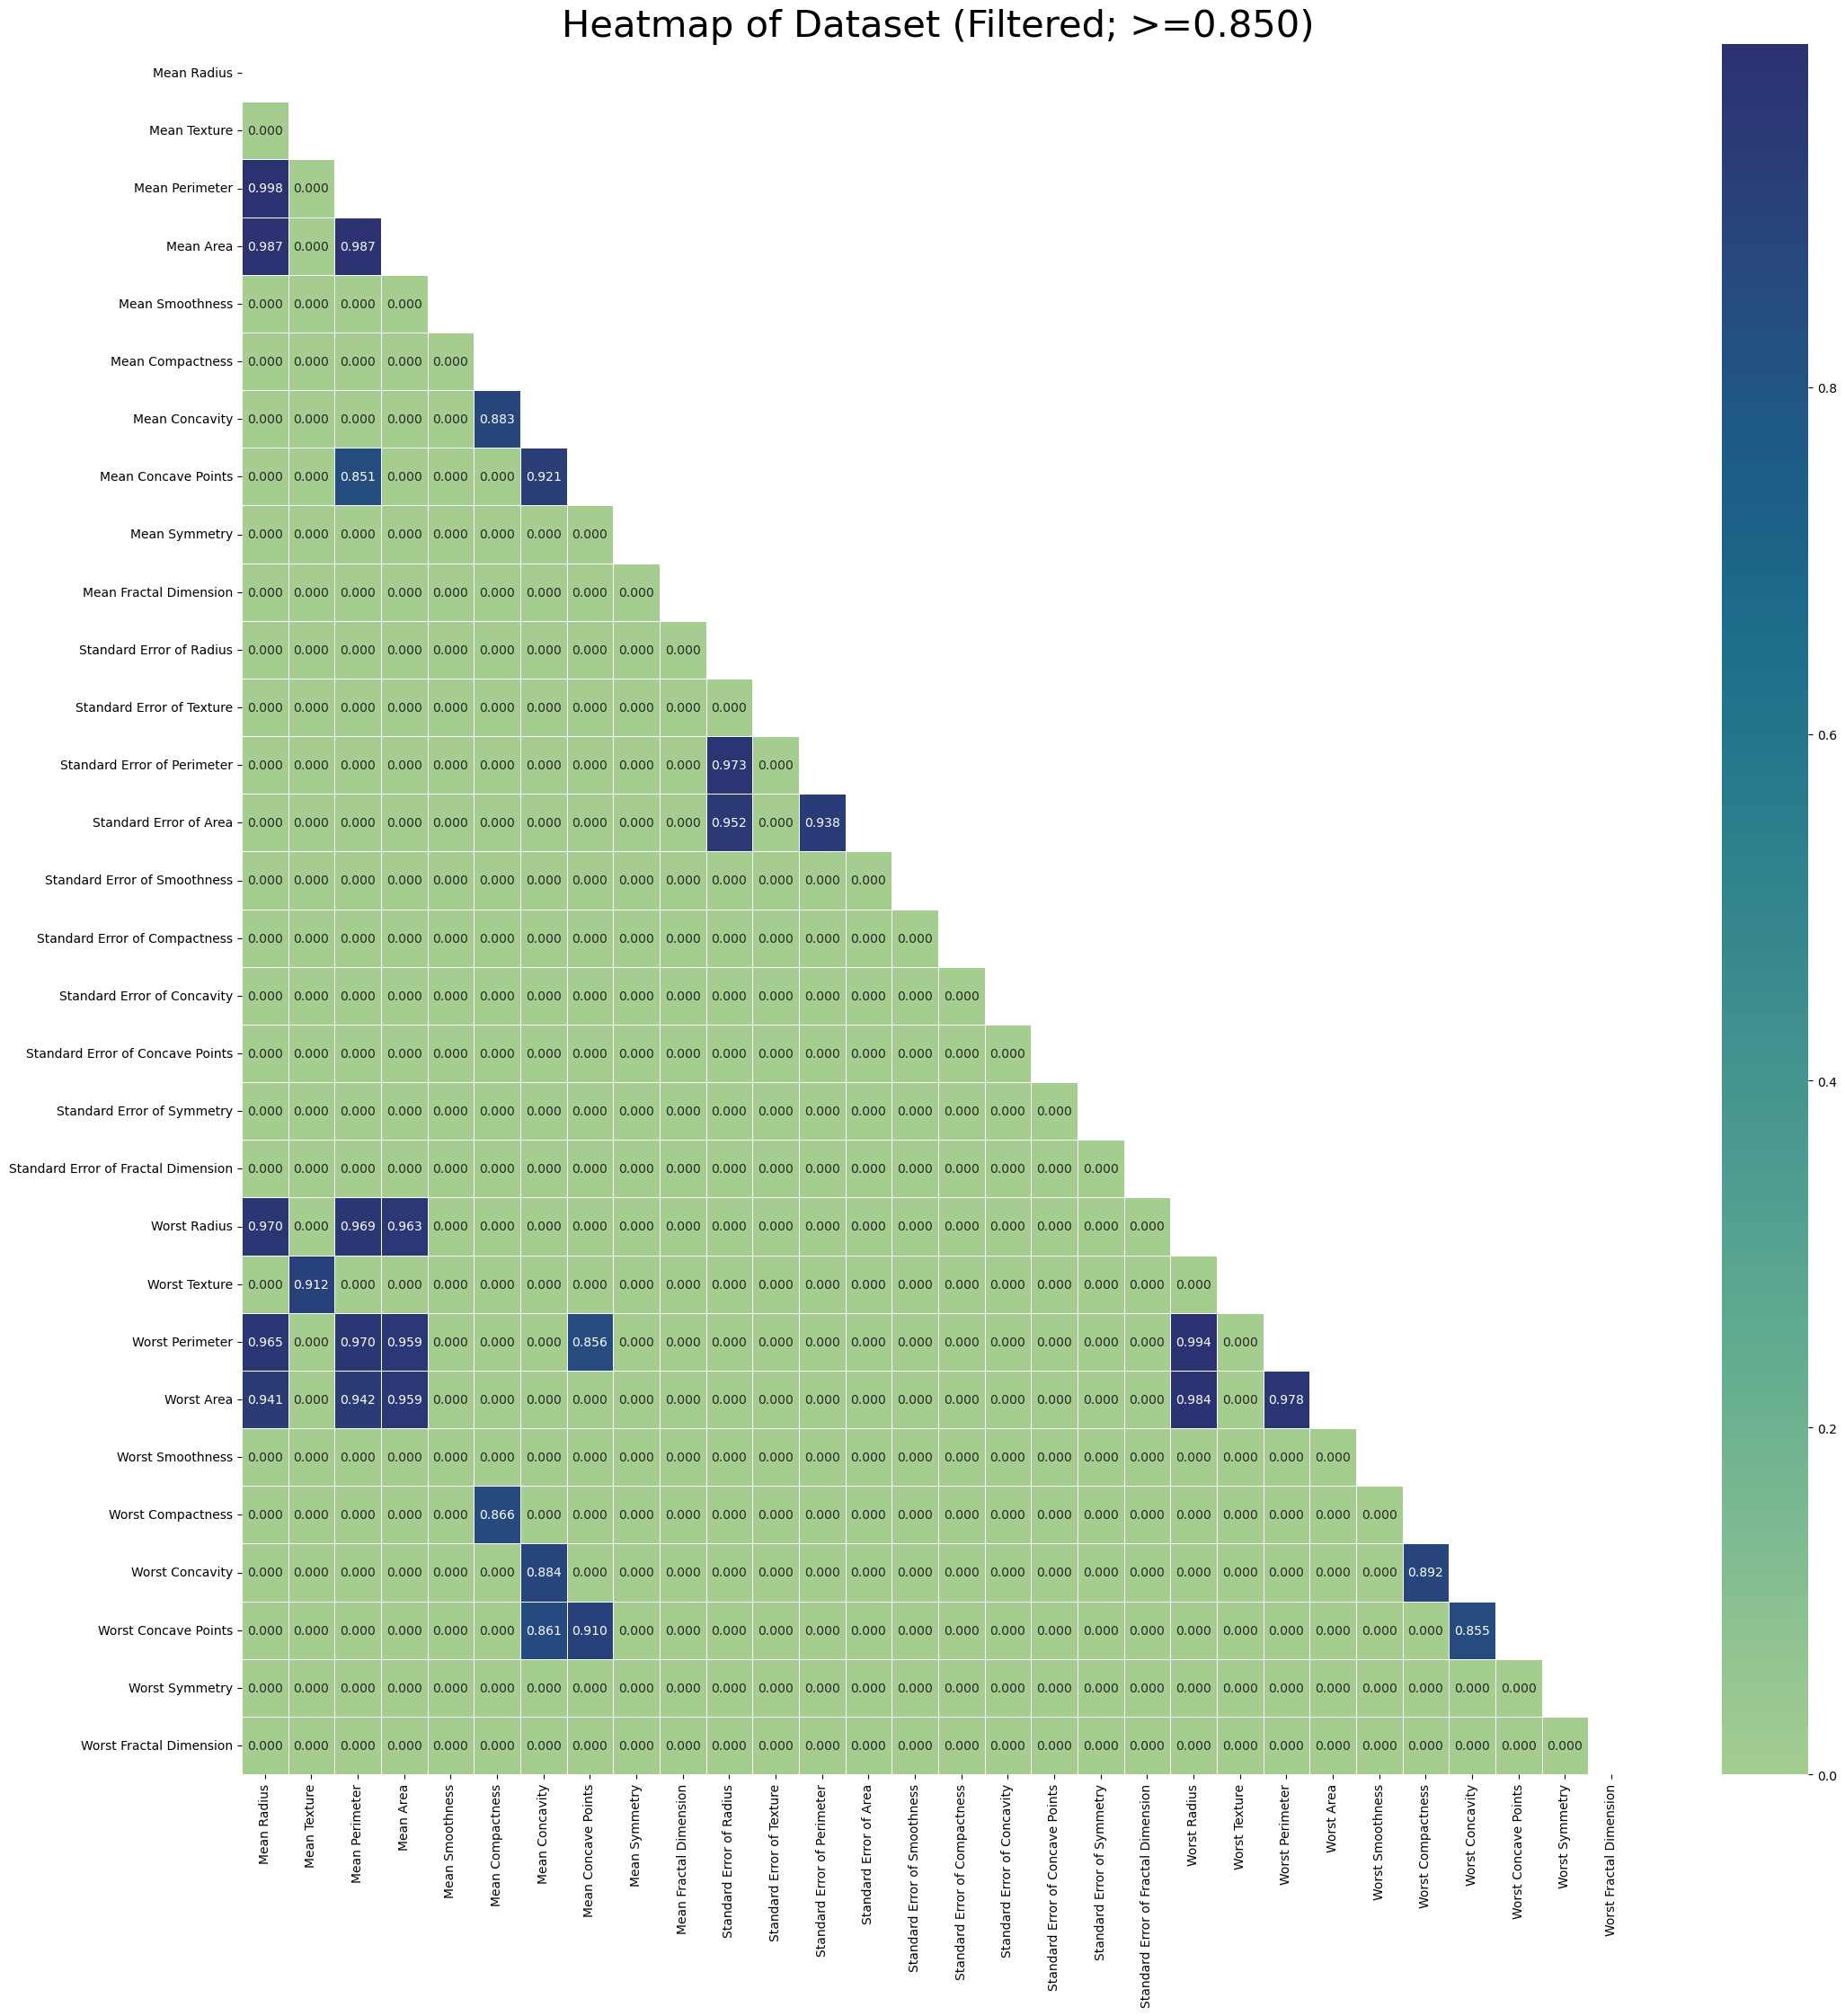

In [81]:
heat.figure

Now, we can list correlations by grouping highly correlated variables with each column. We will only consider groups of 4 or more for simplicity and pragmatism.
- (Mean Radius, Worst Area, Worst Perimeter, Worst Radius, Mean Area, Mean Perimeter)
- (Mean Perimeter, Worst Area, Worst Perimeter, Worst Radius, Mean Concave Points, Mean Area)
- (Mean Area, Worst Area, Worst Perimeter, Worst Radius)

Interestingly, there are a lot of repeated elements in these groups. We can actually use boolean logic and combine these three groups into just one. *This is because if A correlates with B (say, Mean Radius with Mean Perimeter), and B correlates with C (say, Mean Perimeter with Mean Concave Points), then we can find a correlation between A and C as well (say, Mean Radius with Mean Concave Points)*

This newly formed group is
- (Mean Radius, Worst Area, Worst Perimeter, Worst Radius, Mean Area, Mean Perimeter, Mean Concave Points)

#### This helps us answer the first part of Question 2: There is indeed one group of values that seems to be internally correlated with one another. This group is (Mean Radius, Worst Area, Worst Perimeter, Worst Radius, Mean Area, Mean Perimeter, Mean Concave Points).

Now we can make a simplified heatmap of these values to find the exact correlations between each other.

Text(0.5, 1.0, 'Simplified Heatmap of Dataset (for Q2)')

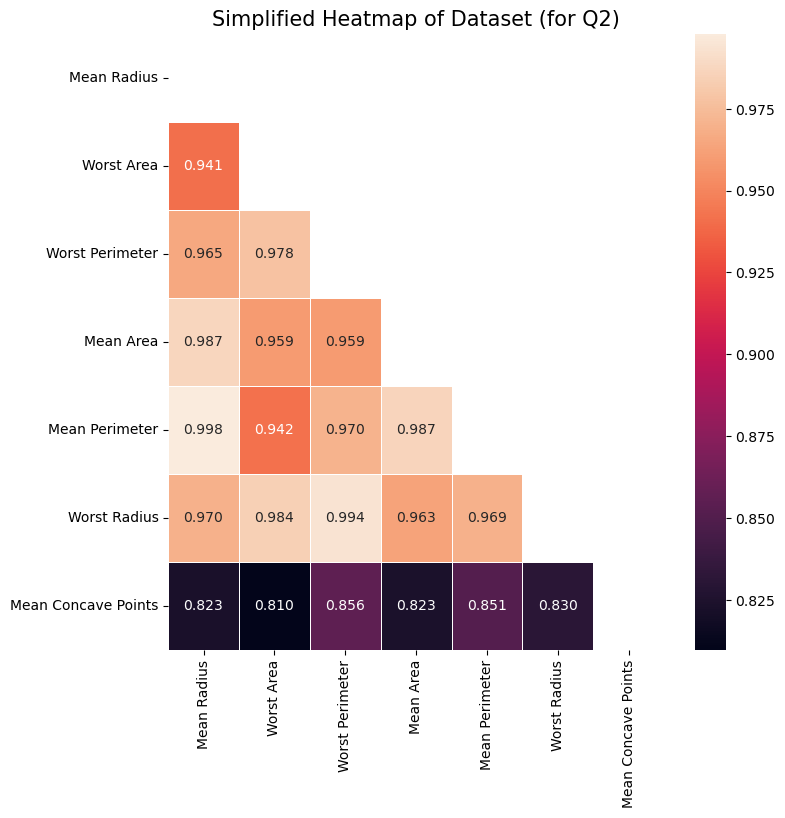

In [82]:
q2_data = data.loc[:, ["Mean Radius", "Worst Area", "Worst Perimeter", "Mean Area", "Mean Perimeter", "Worst Radius", "Mean Concave Points"]]
q2_num_d = q2_data.corr()
plt.figure(figsize = (8, 8))
q2_matrix = np.triu(q2_num_d)
q2_heat = sns.heatmap(data = q2_num_d, annot = True, fmt = ".3f", linewidth = 0.5, mask = q2_matrix)
plt.title("Simplified Heatmap of Dataset (for Q2)", size = 15)

This correlation can be observed and further verified through a pairplot, which would also give us a better idea of the mathematical dependence of a variable on another.

In [2]:
# r2 method taken from https://stackoverflow.com/questions/67268096/how-to-display-pearsonr-squared-and-regression-equation-on-a-pairplot

def r2(x, y, ax = None, **kws):
    ax = ax or plt.gca()
    slope, intercept, r_value, p_value, std_err = linregress(x = x, y = y)
    ax.annotate(f'y = ${slope:.2f}x{intercept:+.2f}$',
                xy = (.05, .95), xycoords = ax.transAxes, fontsize = 12,
                color = 'darkred', backgroundcolor = '#FFFFFF99', ha = 'left', va = 'top')

q2_pair = sns.pairplot(data = q2_data, kind = "reg", diag_kind = "kde")
plt.suptitle("Pair Plot of Highly Internally Correlated Values", y = 1, fontsize = 20)
    
q2_pair.map_lower(r2)
for i, j in zip(*np.triu_indices_from(q2_pair.axes, 1)):
    q2_pair.axes[i, j].set_visible(False)

plt.figure(figsize = (15, 15))
    
plt.show()

NameError: name 'q2_data' is not defined

#### For all the above highly internally correlated values, we can view the mathematical correlation between each of them from the pair plot and hence closely predict other values in this subset based on that of just one.